# Question 2: Materials Project API Exploration

**2.1 Querying Materials Project Database**

You will use the Materials Project API (MPRester and pymatgen) to query materials based on various criteria. You may choose to use the legacy or the new API.

a) Initialize MPRester and query materials to find stable (within 50meV of convex hull) binary oxides with density greater than 4 g/cc. For these materials extract materials properties from materials project. 

In [50]:
import pandas as pd
from pymatgen.ext.matproj import MPRester
import os

filename = r'G:\My Drive\teaching\5540-6640 Materials Informatics\old_apikey.txt'

def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)


Sparks_API = get_file_contents(filename)
mpr = MPRester(Sparks_API)

# Query materials with stable binary oxides, density > 4 g/cc, and within 50 meV of the convex hull
criteria = {
    'elements': {'$all': ['O']},
    'nelements': 2,  # Binary oxides
    'e_above_hull': {'$lte': 0.05},  # Within 50 meV of the convex hull
    'density': {'$gte': 4.0}  # Density greater than 4 g/cc
}

# Properties to extract
properties_to_extract = ['pretty_formula', 'density', 'e_above_hull']

# Perform the query
results = mpr.query(criteria, properties_to_extract)


c:\Users\taylo\miniconda3\envs\MyPymatgen\lib\site-packages\pymatgen\ext\matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


b) Display basic information about the queried materials.



In [51]:
# Display the extracted materials properties
for material in results:
    print("Formula:", material['pretty_formula'])
    print("Density:", material['density'])
    print("Energy above hull:", material['e_above_hull'])
    print("\n")


Formula: PtO2
Density: 9.198821418850256
Energy above hull: 0.0048357716666664885


Formula: Ni5O6
Density: 5.837721966673306
Energy above hull: 0.04071467954545582


Formula: GeO2
Density: 4.119932963332035
Energy above hull: 0.04500645041667184


Formula: SnO2
Density: 6.60788196564374
Energy above hull: 0.0003258391666642879


Formula: Ti3O
Density: 4.839896564388118
Energy above hull: 0


Formula: V5O9
Density: 4.42802132238897
Energy above hull: 0.0076232883928746276


Formula: NdO2
Density: 6.585657950734349
Energy above hull: 0


Formula: Ti8O15
Density: 4.1614410122496315
Energy above hull: 0.01500605902175245


Formula: V6O11
Density: 4.048801227514153
Energy above hull: 0.04818250676471614


Formula: Sb2O5
Density: 5.356064921834027
Energy above hull: 0.0374645228571433


Formula: Pb2O3
Density: 9.424445473457055
Energy above hull: 0.00943726274999701


Formula: Ti2O
Density: 4.904790809551801
Energy above hull: 0.0497722566666674


Formula: PtO2
Density: 11.249716147991846
E

**2.2 Matching Structures to CIF Cards**

c) Using the Crystallographic Open Database (http://crystallography.net/cod/search.html) or the American Mineralogist Crystal Structure Database (https://rruff.geo.arizona.edu/AMS/amcsd.php) look up the cif card for your birth month (https://en.wikipedia.org/wiki/Birthstone). 

Then, see if you can use that cif card to find any Materials Project matches. Save the mp-id's to a list

In [53]:
fpath = "diamond.cif"
with MPRester(Sparks_API) as mpr:
  mpid = mpr.find_structure(fpath)[0]
  print(mpid)
  struct = mpr.get_structure_by_material_id(mpid)
  symbol, number = struct.get_space_group_info()
  anonymous_formula = m.get_entry_by_material_id(
      mpid,
      property_data=["anonymous_formula"]
      ).data["anonymous_formula"]

  print(symbol, number)
  properties = ["task_id", "pretty_formula", "spacegroup.symbol"]
  criteria = {"spacegroup.symbol": symbol, "anonymous_formula": anonymous_formula}
  results = mpr.query(criteria=criteria, properties=properties)
pd.DataFrame(results)

mp-66
Fd-3m 227


,task_id,pretty_formula,spacegroup.symbol
0,mp-32,Ge,Fd-3m
1,mp-149,Si,Fd-3m
2,mp-1072089,Co,Fd-3m
3,mp-1247117,Pb,Fd-3m
4,mp-1197020,Ge,Fd-3m
5,mp-12771,Se,Fd-3m
6,mp-66,C,Fd-3m
7,mp-1198022,Ge,Fd-3m
8,mp-117,Sn,Fd-3m
9,mp-16220,Si,Fd-3m


**2.3 Plotting Materials Properties**

Plot relevant properties extracted from the Materials Project database.

d) Extract and plot materials properties (e.g., density, formation energy) for the queried materials.

8.442733521518138
Material: Co, Density: 8.442733521518138, Formation Energy: 0.19932627500000066
Material: Sn, Density: 5.371466121024904, Formation Energy: 0.0
Material: Ge, Density: 4.304558292269342, Formation Energy: 0.3213676385294118
Material: Ge, Density: 4.445002140288905, Formation Energy: 0.025571109411764742
Material: Pb, Density: 7.778867734041206, Formation Energy: 0.27344158500000004
Material: Se, Density: 4.110662289330585, Formation Energy: 0.5141247376562501
Material: Si, Density: 2.2811942835376744, Formation Energy: 0.0
Material: Si, Density: 1.9808888079043778, Formation Energy: 0.3375425088235301
Material: Ge, Density: 5.041970034757574, Formation Energy: 0.0
Material: C, Density: 3.4958233725910053, Formation Energy: 0.13641901499999953


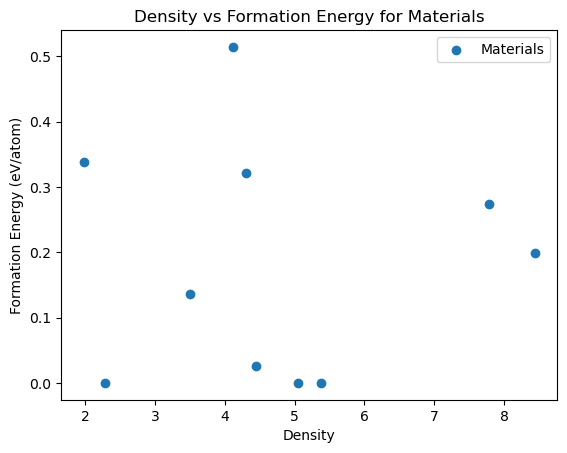

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of Materials Project IDs
mp_ids = ['mp-32', 'mp-149', 'mp-1072089', 'mp-1247117', 'mp-1197020', 'mp-12771', 'mp-66', 'mp-1198022', 'mp-117', 'mp-16220']

properties = ["pretty_formula", "density", "formation_energy_per_atom"]
criteria = {"material_id": {"$in": mp_ids}}
results = mpr.query(criteria=criteria, properties=properties)

print(results[0]['density'])

# Lists to store extracted data
densities = []
formation_energies = []

# Loop through the results and extract data
for result in results:
    density = result['density']
    formation_energy = result['formation_energy_per_atom']

    # Append data to lists
    densities.append(density)
    formation_energies.append(formation_energy)

    # Print data if needed
    print(f'Material: {result["pretty_formula"]}, Density: {density}, Formation Energy: {formation_energy}')

# Plotting
plt.scatter(densities, formation_energies, label='Materials')
plt.xlabel('Density')
plt.ylabel('Formation Energy (eV/atom)')
plt.title('Density vs Formation Energy for Materials')
plt.legend()
plt.show()